In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import plotly as plty
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Problem Statement:-
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.  
1.	Read the column description and ensure you understand each attribute well
2.	Study the data distribution in each attribute, share your findings(5 points)
3.	Get the target column distribution. Your comments
4.	Split the data into training and test set in the ratio of 70:30 respectively
5.	Use different classification models (Logistic, Linear) to predict the likelihood of a liability customer buying personal loans.(15 
        points)
6.	Print the confusion matrix for all the above models.(5 points)
 7.   Give your reasoning on which is the best model in this case and why it performs better?(5 point

In [3]:
df=pd.read_csv('C:/Users/gotti/Downloads/Bank_Personal_Loan_Modelling-1.csv', sep=',')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Attribute Description:-
**ID** :-Customer ID  							
**Age**:-Customer's age in completed years  							
**Experience**:-Number of years of professional experience	  						
**Income**:-Annual income of the customer ($000)               
**ZIPCode**:-Home Address ZIP code                                                                                              **Family**:-Family size of the customer                                   	          						
**CCAvg**:-	Avg. spending on credit cards per month ($000)                                                      							
**Education**:-	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
**Mortgage**:-Value of house mortgage if any. ($000)							
**Personal Loan**:-	Did this customer accept the personal loan offered in the last campaign?							
**Securities Account**:-Does the customer have a securities account with the bank?							
**CD Account**:-Does the customer have a certificate of deposit (CD) account with the bank?							
**Online**:-Does the customer use internet banking facilities?							
**CreditCard**:-Does the customer use a credit card issued by UniversalBank?							

## Shape of dataset:-

In [5]:
df.shape

(5000, 14)

Our dataset consists of 5000 records with 14 attributes.

## Information of the dataset:-

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


From the above obtained information we notice that the dataset has no null values present in it and there is only one float type of attribute present in it that is only from CCAvg rest of the data attributes consists of all integer values.

## Statistics:-

In [7]:
df.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


From the above obtained we get the brief idea on attributes now by performing univariate analyses on each attribute we understand each attribute clearly.

## Univariate Analysis:-

### Age:-

In [8]:
df['Age'].value_counts()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

From the obtained we observe that there are more number of persons consisting of age 35 and the second highest is age is 43 and least members are present in the age group of 67

### Grouping age:-

In [9]:
df['age_group'] = pd.cut(
    df['Age'],
    np.arange(start=df['Age'].min(), step=5, stop=df['Age'].max())
)
df[['Age', 'age_group']].head()

,Age,age_group
0,25,"(23, 28]"
1,45,"(43, 48]"
2,39,"(38, 43]"
3,35,"(33, 38]"
4,35,"(33, 38]"


we group the persons with the 5steps of age group.

### Visualizing the age group:-

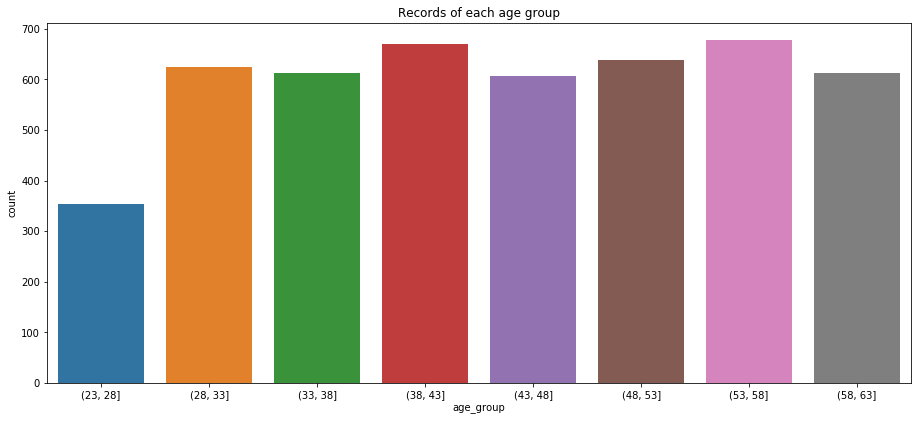

In [10]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='age_group', data=df, ax=ax)

plt.title('Records of each age group')
plt.show()

These visualization gives us the idea of the each age group.

### Income:-

In [11]:
df['Income'].value_counts()

44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

From the obtained out put we observe that the most number of persons are earning 44 and 35 only. There are only few people who earns more which means this dataset describes the average the average income of 44 which means it is describing the middle class people.

### Grouping income range:-

In [12]:
df['Income_group'] = pd.cut(
    df['Income'],
    np.arange(start=df['Income'].min(), step=60, stop=df['Income'].max())
)
df[['Income', 'Income_group']].head()

,Income,Income_group
0,49,"(8, 68]"
1,34,"(8, 68]"
2,11,"(8, 68]"
3,100,"(68, 128]"
4,45,"(8, 68]"


In [13]:
df['Income_group'].value_counts()

(8, 68]       2622
(68, 128]     1608
(128, 188]     661
Name: Income_group, dtype: int64

From the above obtained output we observe that we are grouping the customers as low income earning, average income earning, high income earning customers.

### Visualizing the Income group:-

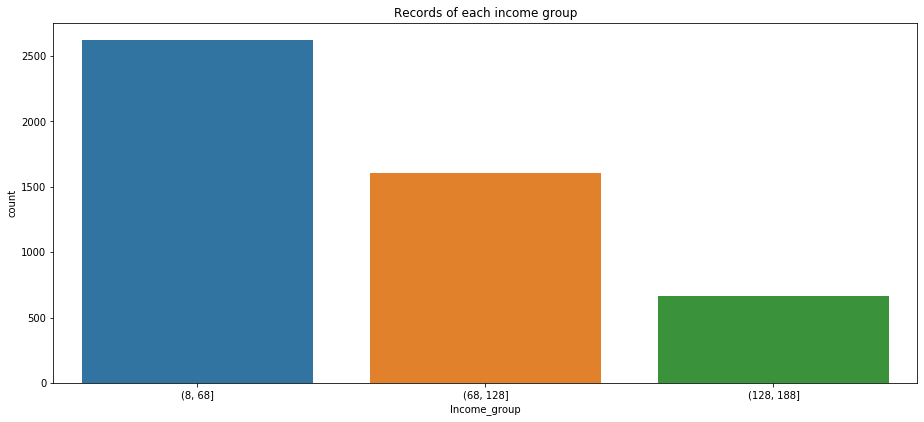

In [64]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Income_group', data=df, ax=ax)

plt.title('Records of each income group')
plt.show()

These visualiztion gives us the clear idea of the income group.

### Experience:-

In [15]:
df['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

we are noticing that there are negative values present in it which means there are persons who doesnt have professional experience and applying for the loan where there are less amount of persons present in our dataset.

### Zipcode:-

In [16]:
df['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

From these above obtained zip codes we observe that there are more number of customers from Berklin and less number of customers from santaclara.

### Family:-

In [17]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

From these we can observe that there are more number of bachelors present in our dataset.

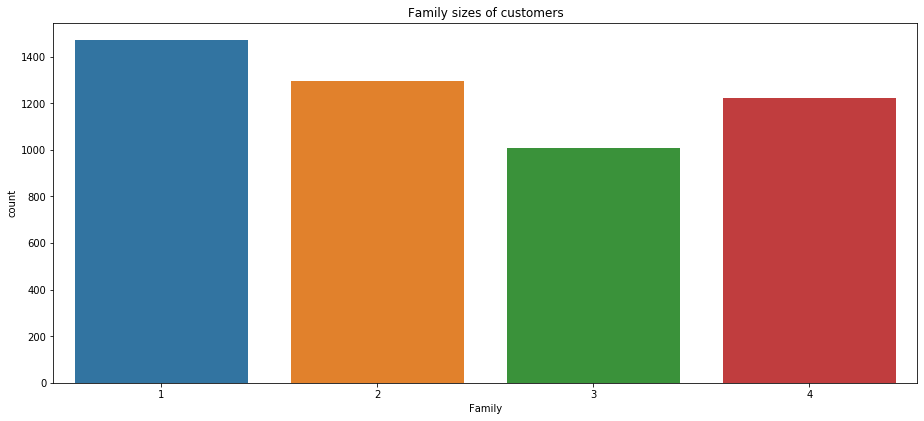

In [65]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Family', data=df, ax=ax)

plt.title('Family sizes of customers')
plt.show()

### C C Average:-

In [19]:
df['CCAvg'].value_counts()

0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

There are more number of customers who spent less amount of money in credit card transaction.

### Education:-

In [20]:
df['Education'].value_counts()


1    2096
3    1501
2    1403
Name: Education, dtype: int64

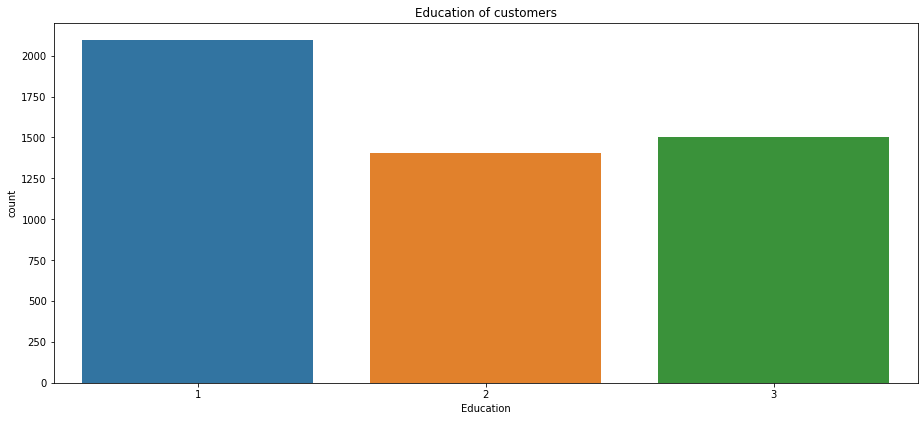

In [66]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Education', data=df, ax=ax)

plt.title('Education of customers')
plt.show()

From these we observe that there are more number of customers who are undergraduate.

### Mortgage:-

In [22]:
df['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

There are more number of customers who doesnt have own house.

### Personal Loan:-

In [23]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

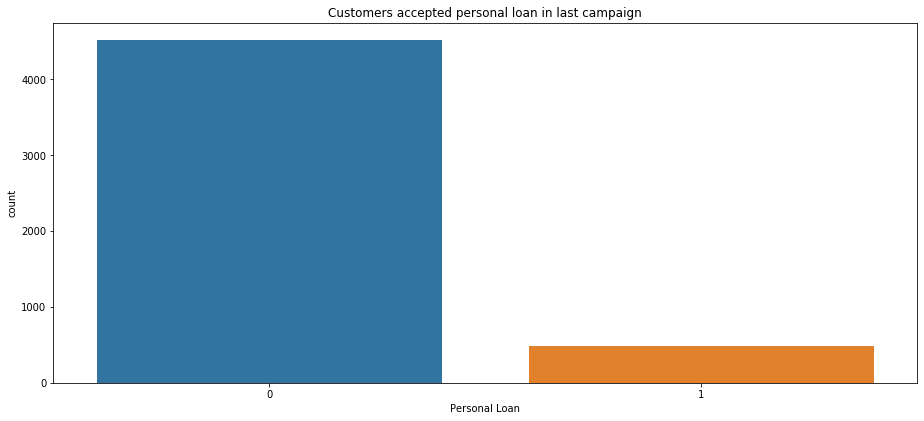

In [67]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Personal Loan', data=df, ax=ax)

plt.title('Customers accepted personal loan in last campaign')
plt.show()

There are more number of customers who have not accepted personal loan in last campaign.

### Securities Account:-

In [25]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

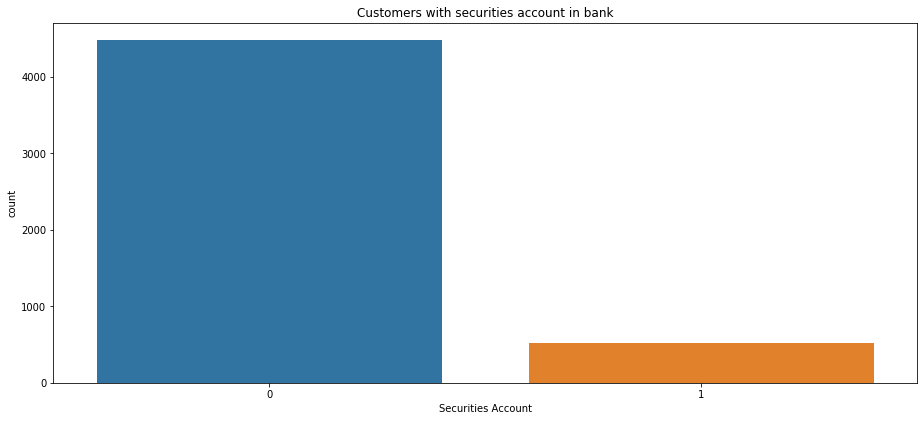

In [68]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Securities Account', data=df, ax=ax)

plt.title('Customers with securities account in bank')
plt.show()

There are more number of customers who does have security account in the bank.

### CD Account:-

In [27]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

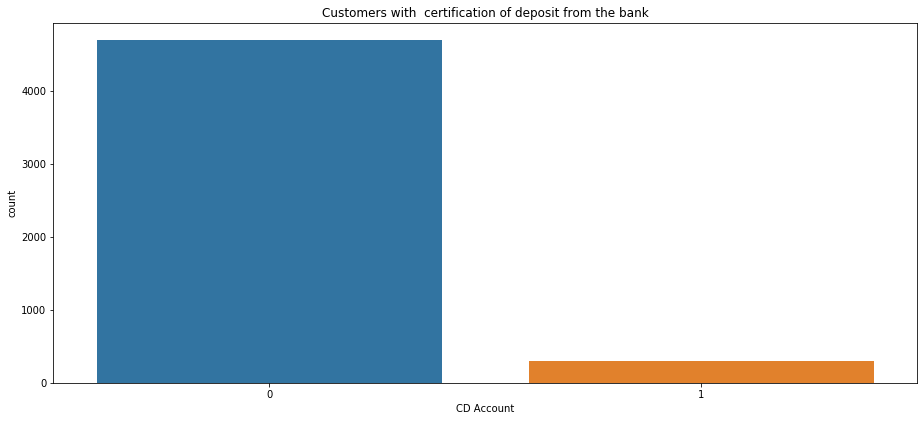

In [69]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='CD Account', data=df, ax=ax)

plt.title('Customers with  certification of deposit from the bank' )
plt.show()

There are more number of customers who does not have certification of deposit from the bank.

### Online:-

In [29]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

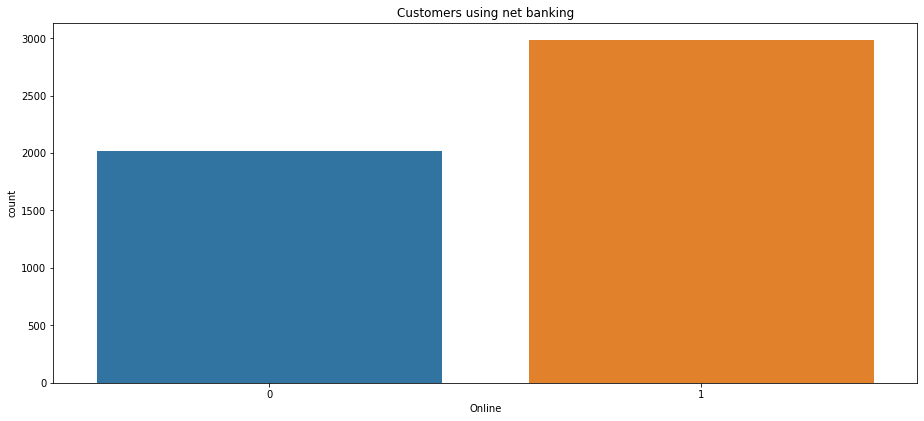

In [70]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Online', data=df, ax=ax)

plt.title('Customers using net banking')
plt.show()

There are more number of customers who uses net banking are more.

### CreditCard:-

In [31]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

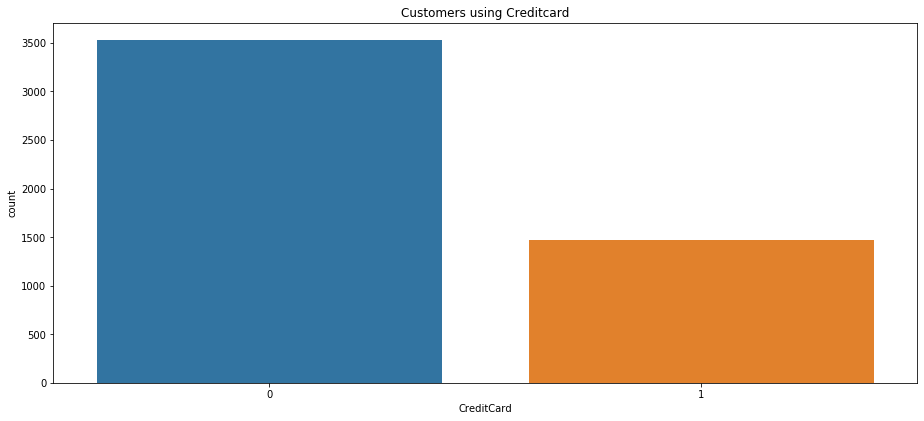

In [71]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='CreditCard', data=df, ax=ax)

plt.title('Customers using Creditcard')
plt.show()

There are more number of customers who are not using the credit card of the universal bank.

### Bivariate Analyses:-

### Income based on Education:-

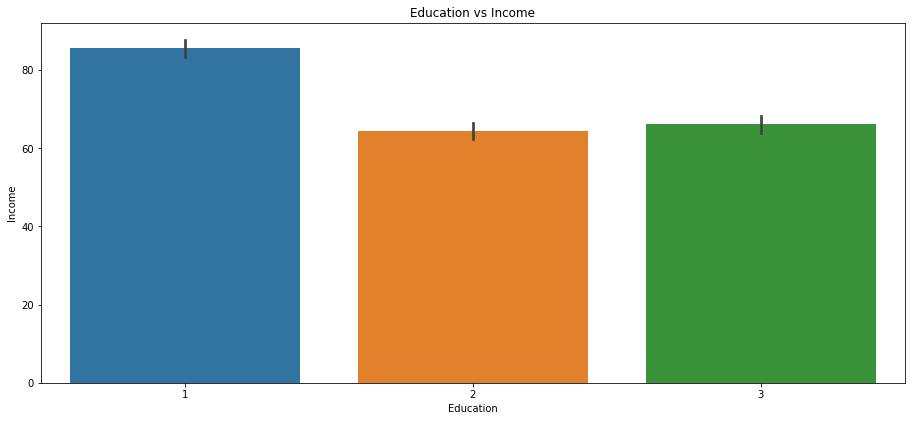

In [72]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df['Education'], y=df['Income'], ax=ax)

plt.title('Education vs Income')
plt.show()

The students who are undergraduate are earning more income compared to others.

### Income based on Experience:-

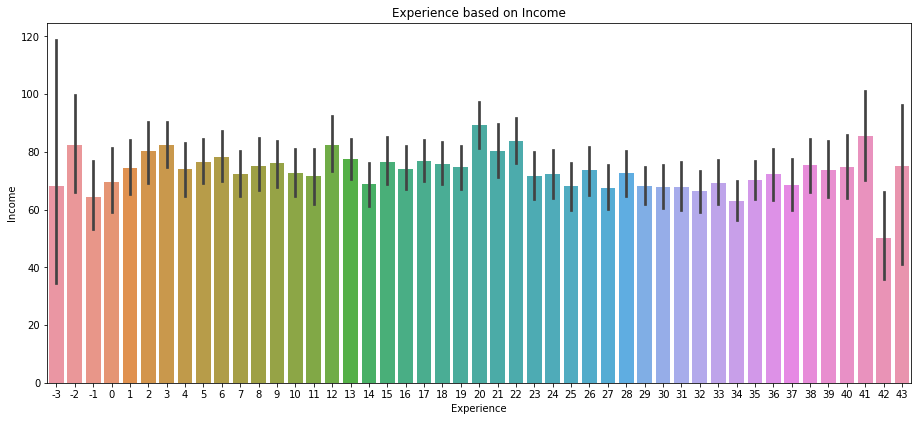

In [73]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df['Experience'], y=df['Income'], ax=ax)

plt.title('Experience based on Income')
plt.show()

From the above obtained bar plot we can observe that experience is not playing any role in earning income they are all most same.

###  Income based on age:-

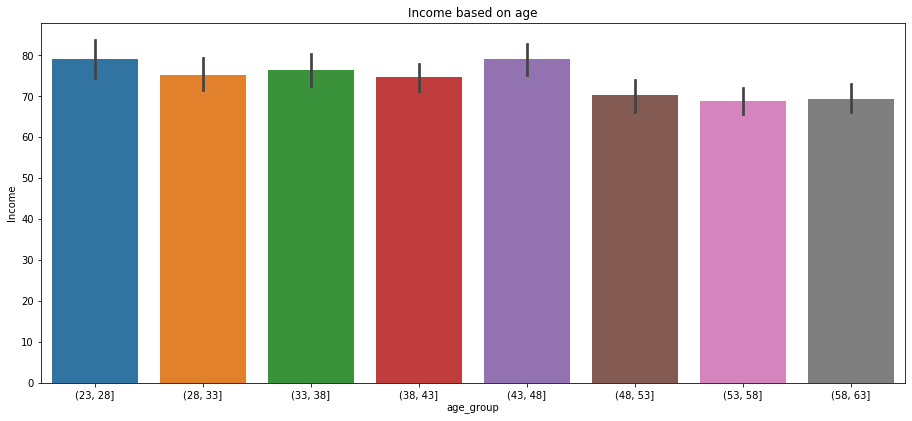

In [74]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df['age_group'], y=df['Income'], ax=ax)

plt.title('Income based on age')
plt.show()

These shows us the age group between 43 and 48 are earnng slightly high income compared to other age groups.

### Income based on recently accepted personal loans:-

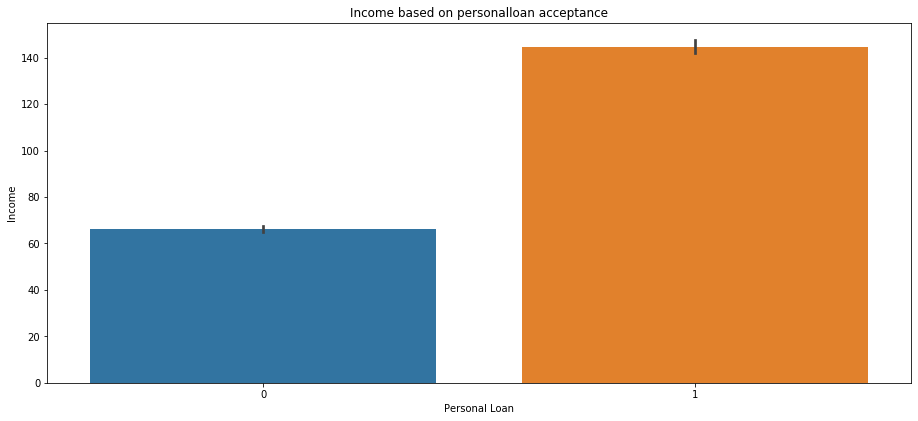

In [75]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df['Personal Loan'], y=df['Income'], ax=ax)

plt.title('Income based on personalloan acceptance')
plt.show()

From these we can observe that who earns more income has taken the personal loan.

### Income based on family:-

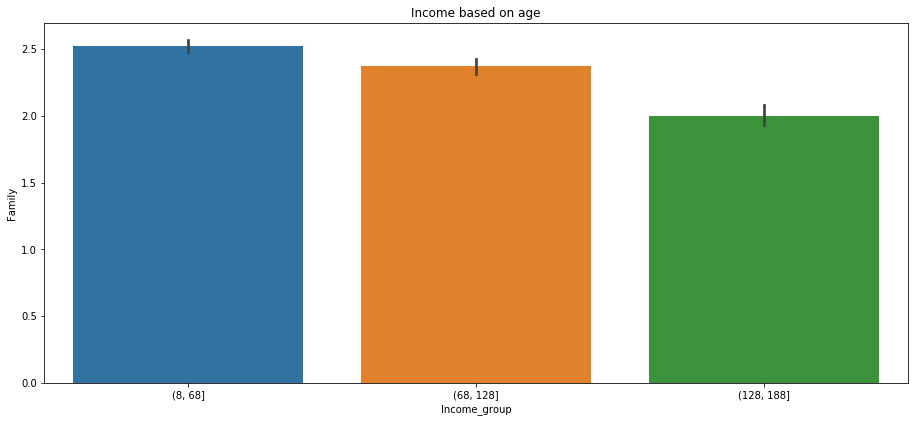

In [76]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df['Income_group'], y=df['Family'], ax=ax)

plt.title('Income based on age')
plt.show()

From these we can observe that the customers whose family size is more earns less income compared to others.

### Multivariate Analysis:-

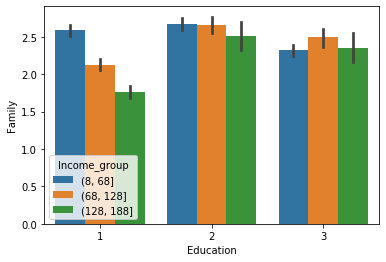

In [38]:
sns.barplot(df['Education'],df['Family'],df['Income_group'])

The customers who are graduated and with family members morethan 2 are falling highly more in all three different income groups.

### Collinearity between each attribute:-

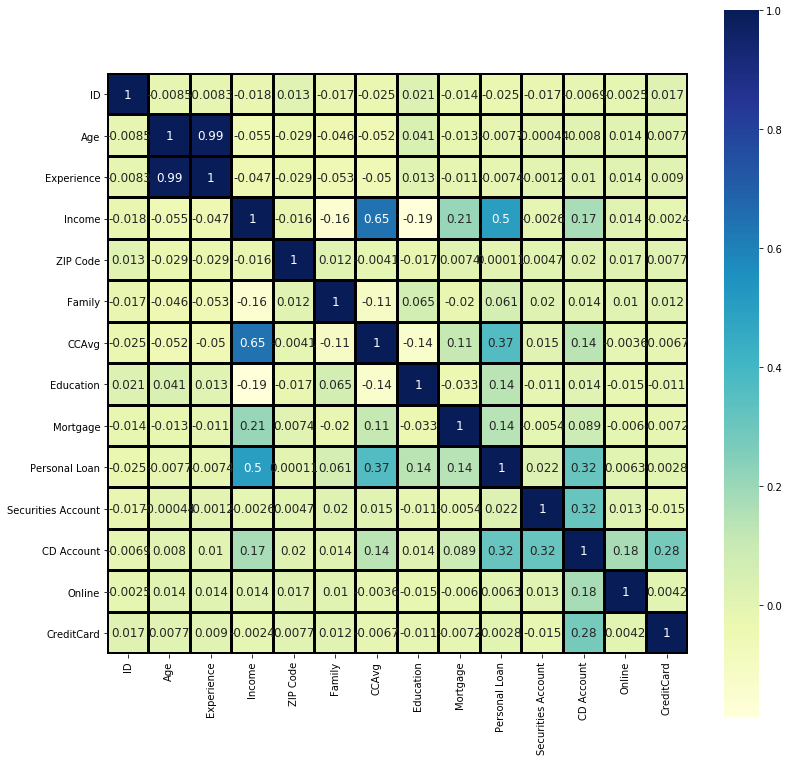

In [39]:
fig, axs = plt.subplots(nrows=1, figsize=(13, 13))
sns.heatmap(df.corr(), annot=True, square=True, cmap='YlGnBu', linewidths=2, linecolor='black', annot_kws={'size':12})

From these we can observe personal loan is playing high role based on income some what less collinearity based on ccavg and cdaccount.

### Modelling:-

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X=df[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']]
y=df['Personal Loan']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.linear_model import LogisticRegression

### Logistic Regression:-

In [44]:
LR = LogisticRegression()

In [45]:
LR.fit(X_train,y_train)
print("Test Accuracy {}".format(LR.score(X_test,y_test))) 

LRscore = LR.score(X_test,y_test)

Test Accuracy 0.9473333333333334


C:\Users\gotti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In the above step we are finding the accuracy of the output by training our data and predicting score is calculated by  the test accuracy for solving our problem using logistic regression algorithm. our obtained accuracy  is 94 percent which means by predicting our output using logistic regression algorithm gives us the result with 94 percent accuracy. for clear cut understanding we see the confusion matrix.

In [77]:
yprediciton1= LR.predict(X_test)
ytrue = y_test


CM = confusion_matrix(ytrue,yprediciton1)


### Confusion matrix for Logistic Regression:-

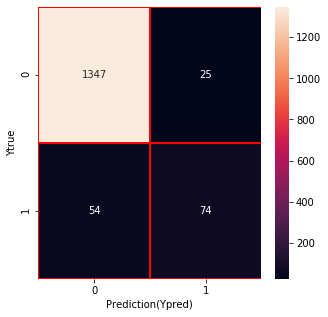

In [47]:

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

From the above obtained confusion matrix we observe that 1347 True positives and 74 True negatives. where as 25 False positives and 54 false negatives.

### SVM:-

In [48]:
from sklearn.svm import SVC

SVM = SVC(random_state=42)

In [49]:
SVM.fit(X_train,y_train)  
#SVM Test 
print ("SVM Accuracy:", SVM.score(X_test,y_test))

SVMscore = SVM.score(X_test,y_test)

SVM Accuracy: 0.9146666666666666


By predicting our data using svm gives us 91 percent accuracy.

In [50]:
yprediciton2= SVM.predict(X_test)
ytrue = y_test


CM2 = confusion_matrix(ytrue,yprediciton2)

### Confusion Matrix for SVM:-

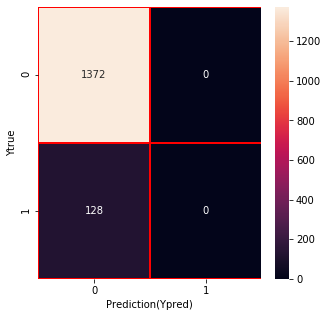

In [51]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM2,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

From the above obtained confusion matrix for svm we observe that the model is not giving us true negatives and false positives which is also giving 128 false negatives which would affect our model so we does not consider svm for predicting our output.

### Naive bayes:-

In [52]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [53]:
NB.fit(X_train,y_train) 

print("Accuracy of NB Score: ", NB.score(X_test,y_test))

NBscore= NB.score(X_test,y_test)

Accuracy of NB Score:  0.8886666666666667


By using Naive bayes for predicting our data we would get 88 percent accuracy only. for better understanding of the model we plot the confusion matrix.

In [54]:
yprediciton3= NB.predict(X_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM3 = confusion_matrix(ytrue,yprediciton3)


### Confusion Matrix For Naive Bayes:-

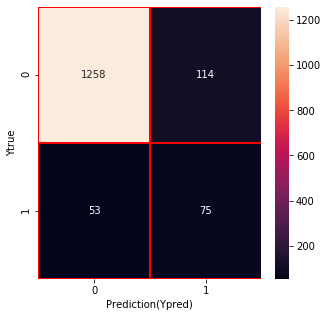

In [55]:

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM3,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

From the above obtained confusion matrix we obtain 1258 True positives and 114 false negatives. It is also predicting 53 false positives and 75 true negative where as the number of false negatives is high we would not consider the model.

### Decision Tree Classifier:-

In [56]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [57]:
DTC.fit(X_train,y_train) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(X_test,y_test))
DTCscore = DTC.score(X_test,y_test)

Decision Tree Score:  0.9773333333333334


By predicting our data by using decision tree classifier is giving us the accuracy of 98 percent which means high compared to other models.

In [58]:
yprediciton4= DTC.predict(X_test)
ytrue = y_test
CM4= confusion_matrix(ytrue,yprediciton4)

### Confusion matrix for Decision Tree Classifier:-

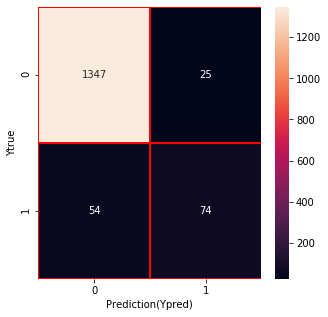

In [59]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

From the above obtained confusion matrix for decision tree classifier we observe the rate of True positives is 1358 and the rate of True Negatives is 114 where as the rate of the false postives and false negatives are low.

### Random Forest:-

In [60]:
RFC= RandomForestClassifier(n_estimators = 24, random_state=42)

In [61]:
RFC.fit(X_train,y_train) 
print("Random Forest Score: ",RFC.score(X_test,y_test))
RFCscore=RFC.score(X_test,y_test)

Random Forest Score:  0.984


The Random forest is giving us the accuracy score of 98 percent where as the decision tree is also giving us the same accuracy score. Where as the set of the decision tree would form a random forest thats where they are giving us the same amount of the accuracy score.

In [62]:
yprediciton5= RFC.predict(X_test)
ytrue = y_test
CM5= confusion_matrix(ytrue,yprediciton5)

### Confusion Matrix For Random Forest:-

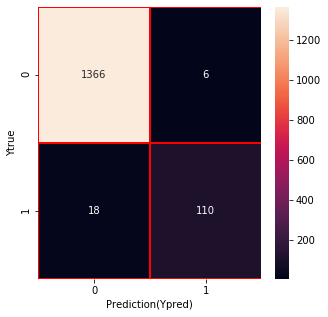

In [63]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM5,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

From the above obtained confusion matrix we observe that the rate of the True Positives and True Negatives where as the rate of the false positives and false negatives would also  be the good model.

## Conclusion:-

We can conclude our analysis by using following points:-
* From the analysis of the data we observe that the customers with the education being graduates and having more than 2           members in the family they are being good at there income by comparing with other groups, where as the customers with the       certified deposit account in the bank are less in number they are above 4000 customers. Based on the recently accepted         loans the customers earning high income are accepted  more in number. There are more number of customers having netbanking     they are nearly 3000 customers, there are less amount of customers using Credit card nearly 3500 customers doesnt have         credit card issued by universalbank.
* The accuracy score for the Logistic regression is 94 percent, for SVM 91 percent, For Naivebayes 88 percent, for               Decisiontree it is giving 98 percent and for Randomforest also it is giving 98 percent accuracy. By obsrving the accuracy       scores we can say that by predicting our data by using Decision Tree or Random Forest would give us better output.      
* By observing the confusion matrix for each model we observe that SVM is giving us only True positives and False negatives       only where as for the other models the ratio false positives and false negatives are high comparatively Decisio tree is         giving 1358 True Positives and 114 True negatives where as the ratio of the false positives and false negatives is low.         In the same way the Random Forest is giving 1366 True Positives and 110 True negatives where as the false postives and         false negatives are low.       
* Hence by above obtained points we observe that by predicting our data by using Desicion Tree and Random Forest would give       us the good results where as the error occurence rate for these models are low.
    